# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [2]:
DATA_FOLDER = './Data' # Use the data folder provided in Tutorial 02 - Intro to Pandas.

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average per month* of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

In [36]:
import pandas as pd
from pylab import *
import math
import numpy as np
import matplotlib.pyplot as plt
import glob
%matplotlib inline

First a function was created to concatenate all the ebola datasets of a given country. This function iterates over all files in the data directory that is provided as a parameter of the function. The function returns a dataframe of all datasets with only the columns provided in column_names parameter which we will need to do this task. We will only need the dates, the description/variable and the totals/national columns.

In [4]:
#a function to collect data from all days recorded
def concatenate(directory_path,column_names):
    directory = glob.glob(directory_path + "/*.csv")
    frame = pd.DataFrame()
    list_ = []
    for file in directory:
        df = pd.read_csv(file,usecols=column_names) # we only need the date, the variable/description and the totals/national for this task
        list_.append(df)
    frame = pd.concat(list_)
    return frame

Then, as shown below the concatenate function was applied to all 3 directories of guinea, liberia and sierra leone.

In [5]:
#importing data
guinea_data=concatenate(DATA_FOLDER + '/ebola/guinea_data',['Date','Description','Totals'])
liberia_data=concatenate(DATA_FOLDER + '/ebola/liberia_data',['Date','Variable','National'])
sl_data=concatenate(DATA_FOLDER + '/ebola/sl_data',['date','variable','National'])

The function below takes a dataset and turns the date column to a column containing only the corresponding month. This function was adapted to all the ways the date was expressed in the datasets. For example the dates in the liberia datasets was expressed as mm/day/year while the other two datasets are written like so : day.month.year or day/month/year.

In [6]:
#take a date written as in our datasets and returns only the month
def dateToMonth(date,liberia) :
    months=['01 January','02 February','03 March','04 April','05 May','06 June',
            '07 July','08 August','09 September','10 October','11 November','12 December']
    if(not(liberia)): 
        return months[int(date.replace('.','-').split('-')[1])-1]
    else : 
        return months[int(date.split('/')[0])-1]

In the code below, all 3 datasets are transformed with the function dateToMonth.

In [7]:
#transform date to month in dataframes
guinea_data['Date']=guinea_data['Date'].apply(lambda x : dateToMonth(x,False))
liberia_data['Date']=liberia_data['Date'].apply(lambda x : dateToMonth(x,True))
sl_data['date']=sl_data['date'].apply(lambda x : dateToMonth(x,False))

Below, all useless rows in guinea data are filtered out and only rows giving new cases and new deaths were kept. Then, the numbers were casted to integers to get them ready to be used for the calculation of the mean. Also, the descriptions were modified to be 'Average daily deaths' and 'Average daily new cases'. 

In [8]:
guinea_data=guinea_data[[description=='New cases of suspects' 
                         or description=='New cases of probables' 
                         or description=='New cases of confirmed' 
                         or description=='New deaths registered today' 
                         or description=='New deaths registered' 
                         or description=='New deaths registered today (probables)'
                         or description=='New deaths registered today (suspects)'
                         or description=='New deaths registered today (confirmed)'
                         for description in guinea_data['Description'] ]]
guinea_data=guinea_data.dropna()
guinea_data['Totals']=guinea_data['Totals'].apply(lambda x : int(x))

guinea_data['Description']=guinea_data['Description'].apply(lambda x :'Average daily deaths' 
                                                            if x=='New deaths registered today' or x=='New deaths registered' else'Average ' + x)

Finally, below the mean is calculated by grouping by description and date.

In [9]:
guinea_data=guinea_data.groupby(['Date','Description'])['Totals'].mean()

In [10]:
print(guinea_data)

Date          Description                                    
08 August     Average New cases of confirmed                     12.4000
              Average New cases of probables                      2.0000
              Average New cases of suspects                      11.8000
              Average New deaths registered today (confirmed)     2.0000
              Average New deaths registered today (probables)     0.0000
              Average New deaths registered today (suspects)      0.0000
              Average daily deaths                                3.4000
09 September  Average New cases of confirmed                     13.0000
              Average New cases of probables                      1.1875
              Average New cases of suspects                       5.4375
              Average daily deaths                                3.5625
10 October    Average New cases of confirmed                      6.0000
              Average New cases of probables                  

Same steps as for guinea are performed.

In [11]:
sl_data=sl_data[[description=='new_confirmed' 
                 or description=='new_probable' 
                 or description=='new_suspected'
                 or description=='death_confirmed'
                 or description=='death_suspected'
                 or description=='death_probable'
                 for description in sl_data['variable'] ]]
sl_data=sl_data.dropna()
sl_data['National']=sl_data['National'].apply(lambda x : int(x))
sl_data['variable']=sl_data['variable'].apply(lambda x :'Average daily '+x)

In [12]:
sl_data=sl_data.groupby(['date','variable'])['National'].mean()

In [13]:
print(sl_data)

date          variable                     
08 August     Average daily death_confirmed     326.500000
              Average daily death_probable       35.166667
              Average daily death_suspected       7.166667
              Average daily new_confirmed        20.611111
              Average daily new_probable          1.277778
              Average daily new_suspected         6.055556
09 September  Average daily death_confirmed     476.148148
              Average daily death_probable       37.000000
              Average daily death_suspected      11.000000
              Average daily new_confirmed        36.962963
              Average daily new_probable          0.000000
              Average daily new_suspected         7.000000
10 October    Average daily death_confirmed     905.464286
              Average daily death_probable      159.500000
              Average daily death_suspected      97.392857
              Average daily new_confirmed        56.714286
            

Same steps as for guinea and sierra leone are performed.

In [14]:
liberia_data=liberia_data[[description=='New case/s (confirmed)' 
                           or description=='New Case/s (Probable)'
                           or description=='New Case/s (Suspected)'
                           or description=='Newly reported deaths' for description in liberia_data['Variable'] ]]
liberia_data=liberia_data.dropna()
liberia_data['National']=liberia_data['National'].apply(lambda x : int(x))
liberia_data['Variable']=liberia_data['Variable'].apply(lambda x :'Average daily deaths' 
                                                            if x=='Newly reported deaths'else
                                                            'Average '+x)

In [15]:
liberia_data=liberia_data.groupby(['Date','Variable'])['National'].mean()

In [16]:
print(liberia_data)

Date          Variable                      
06 June       Average New Case/s (Probable)        1.142857
              Average New Case/s (Suspected)       2.428571
              Average New case/s (confirmed)       2.142857
              Average daily deaths                 2.000000
07 July       Average New Case/s (Probable)        3.727273
              Average New Case/s (Suspected)       3.000000
              Average New case/s (confirmed)       1.818182
              Average daily deaths                 4.272727
08 August     Average New Case/s (Probable)       19.777778
              Average New Case/s (Suspected)      12.000000
              Average New case/s (confirmed)       5.444444
              Average daily deaths                23.222222
09 September  Average New Case/s (Probable)       29.333333
              Average New Case/s (Suspected)      28.333333
              Average New case/s (confirmed)       6.166667
              Average daily deaths                37.60

## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

First the metadata is read and stored in a dataframe objet.

In [17]:
#Reading the metadata
metadata=pd.read_excel(DATA_FOLDER + "/microbiome/metadata.xls")
metadata['SAMPLE']=metadata['SAMPLE'].apply(lambda x : 'unknown' if str(x)=='nan' else x)

Below, The files MID1,MID2,...,MID9 are read and concatenated into a single dataframe. 
Also, the column called BARCODE is added and the corresponding file name is stored in that column. Meaning that, all rows from MID1's BARCODE column contain 'MID1' and all the rows from MID2's contain 'MID2' and so on. 

In [18]:
MID=[]
def read_and_prepare_file(filename): 
    file=pd.read_excel(DATA_FOLDER + "/microbiome/"+filename+".xls",header=None)
    #add barcode as the first column and contains the filename. 
    file.insert(0,'BARCODE',filename)
    return file
frame=pd.DataFrame()
for i in range(9):
    df=read_and_prepare_file('MID'+str(i+1))
    MID.append(df)
frame=pd.concat(MID)

Below, the dataframe's indices are made unique.

In [19]:
frame = frame.reset_index(drop=True)

Here, a merge is performed using the column 'BARCODE' and therefore giving us the desired resulting dataframe.

In [20]:
frame=pd.merge(frame,metadata,on='BARCODE')

In [21]:
frame

,BARCODE,0,1,GROUP,SAMPLE
0,MID1,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",7,EXTRACTION CONTROL,unknown
1,MID1,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",2,EXTRACTION CONTROL,unknown
2,MID1,"Archaea ""Crenarchaeota"" Thermoprotei Sulfoloba...",3,EXTRACTION CONTROL,unknown
3,MID1,"Archaea ""Crenarchaeota"" Thermoprotei Thermopro...",3,EXTRACTION CONTROL,unknown
4,MID1,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",7,EXTRACTION CONTROL,unknown
5,MID1,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",1,EXTRACTION CONTROL,unknown
6,MID1,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",1,EXTRACTION CONTROL,unknown
7,MID1,"Archaea ""Euryarchaeota"" Archaeoglobi Archaeogl...",1,EXTRACTION CONTROL,unknown
8,MID1,"Archaea ""Euryarchaeota"" Archaeoglobi Archaeogl...",1,EXTRACTION CONTROL,unknown
9,MID1,"Archaea ""Euryarchaeota"" Halobacteria Halobacte...",1,EXTRACTION CONTROL,unknown


## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [22]:
from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

In [103]:
Titanic = pd.read_excel('./Data/titanic.xls')

# 1. Types and value ranges :


The types of the attributes of our dataframe are shown below

In [74]:
Titanic.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

The maxes are shown below

In [75]:
Titanic.max()

pclass        3.0000
survived      1.0000
age          80.0000
sibsp         8.0000
parch         9.0000
fare        512.3292
body        328.0000
dtype: float64

The Minimums of each attribute are shown below

In [76]:
Titanic.min()

pclass      1.0000
survived    0.0000
age         0.1667
sibsp       0.0000
parch       0.0000
fare        0.0000
body        1.0000
dtype: float64

"pclass", "survived", "sex", "Cabin", "Embarked" and "boat" are Categorical Data, and can be transformed.

# 2. Histograms

In [104]:
#pclass
Titanic['pclass'] = Titanic['pclass'].astype('category', categories=[1,2,3], ordered=False)

In [105]:
#survived
Titanic['survived'] = Titanic['survived'].astype('category', categories=[0,1], ordered=True)

In [106]:
#sex
Titanic['sex'] = Titanic['sex'].astype('category', categories=['male','female'], ordered=False)

In [107]:
#embarked
Titanic['embarked'] = Titanic['embarked'].astype('category', categories=['S','C','Q'], ordered=False)

In [108]:
#cabin
Cab = Titanic['cabin'].value_counts()
Titanic['cabin'] = Titanic['cabin'].astype('category', categories = Cab.index.values , ordered=False)

In [109]:
#boat
Boa = Titanic['boat'].value_counts()
Titanic['boat'] = Titanic['boat'].astype('category', categories =  Boa.index.values , ordered=False)

## 2.1 histograms for the travel class, embarkation port, sex and age.


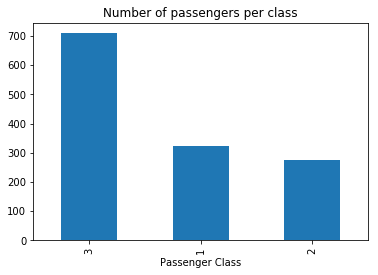

In [131]:
Titanic['pclass'].value_counts().plot(kind='bar',title='Number of passengers per class')
plt.xlabel('Passenger Class')
plt.show()

## 2.2 histograms passengers by embarkation port

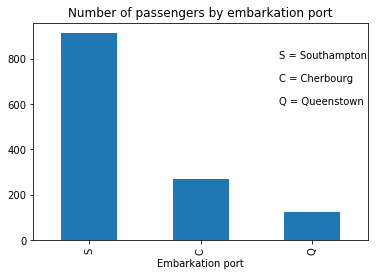

In [154]:
Titanic['embarked'].value_counts().plot(kind='bar',title='Number of passengers by embarkation port')
plt.annotate('S = Southampton', xy=(2, 1), xytext=(1.7, 800))
plt.annotate('C = Cherbourg', xy=(2, 1), xytext=(1.7, 700))
plt.annotate('Q = Queenstown', xy=(2, 1), xytext=(1.7, 600))
plt.xlabel('Embarkation port')
plt.show()

## 2.3 histograms of number of passenger by sex

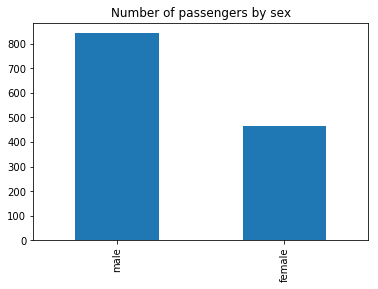

In [155]:
Titanic['sex'].value_counts().plot(kind='bar',title='Number of passengers by sex')

## 2.4 histograms of number of passengers by age interval

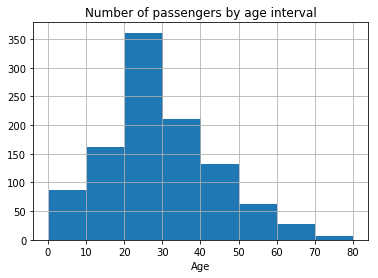

In [160]:
Titanic['age'].hist(bins = 8)
plt.title(r'Number of passengers by age interval')
plt.xlabel('Age')
plt.show()

# 3. Proportion of passengers by cabin floor

Assuming a floor is designated by the letter at the START of each cabin ID : 

D is a dataframe created by iterating through the Titanic 'cabin' and taking only the first letter.

In [198]:
p= np.zeros(len(Titanic))
D = pd.Series(p,index=Titanic.index)
for i in range(len(Titanic)):
    #check fo NaNs
    if (Titanic['cabin'][i]==Titanic['cabin'][i]):
        
        D[i] = Titanic['cabin'][i][0] #Taking the first letter of each cabin name

The pie plot is shown below.

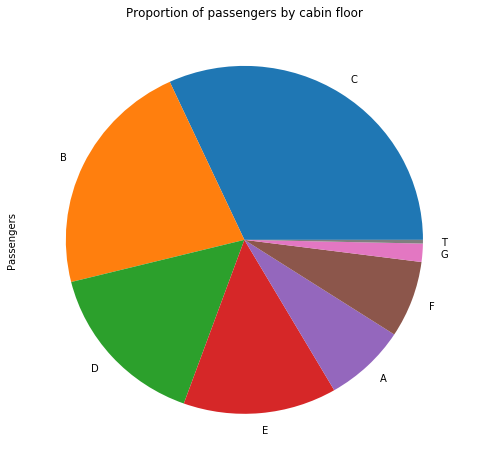

In [195]:
proportions_by_floor= pd.DataFrame({'Passengers':D.value_counts()[1:]})
proportions_by_floor['Passengers'].plot.pie(figsize=(8, 8),title='Proportion of passengers by cabin floor')

# 4. Proportion of survival for each travel class

The travel class dataframes are named T1, T2 and T3  to designate the travel class respectively 1,2 and 3.

In [116]:
T  = Titanic[['pclass','survived']].copy()
T1 = T[T.pclass == 1]
T2 = T[T.pclass == 2]
T3 = T[T.pclass == 3]

The plots are shown below.

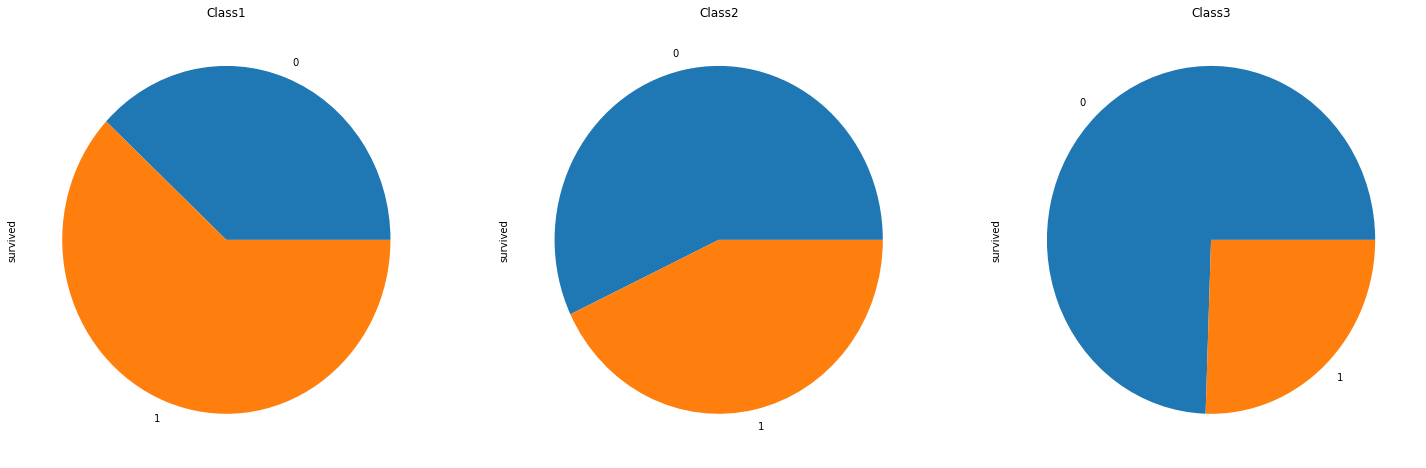

In [117]:
subplot(1,3,1)
# a different line code to switch 1s and 0s and have homogeneous pie charts
T1['survived'].value_counts().sort_index(ascending=True).plot.pie(figsize=(25, 8))
title('Class1')

subplot(1,3,2)
T2['survived'].value_counts().plot.pie(figsize=(25, 8))
title('Class2')

subplot(1,3,3)
T3['survived'].value_counts().plot.pie(figsize=(25, 8))
title('Class3')

plt.show()

# 5. Proportion of survival by travel class and sex

The dataframe Tab is generated by selecting from Titanic only the columns needed.

In [118]:
Tab  = Titanic[['pclass','survived','sex']].copy()

Now, Tab is filtered many times to get the dataframes needed by sex and travel class.

In [119]:
Tab_C1  = Tab[Tab.pclass == 1]
Tab_FC1 = Tab_C1[Tab_C1.sex=='female']
Tab_MC1 = Tab_C1[Tab_C1.sex=='male']

Tab_C2  = Tab[Tab.pclass == 2]
Tab_FC2 = Tab_C2[Tab_C2.sex=='female']
Tab_MC2 = Tab_C2[Tab_C2.sex=='male']

Tab_C3  = Tab[Tab.pclass == 3]
Tab_FC3 = Tab_C3[Tab_C3.sex=='female']
Tab_MC3 = Tab_C3[Tab_C3.sex=='male']

The survival proportion for each case is calculated below by computing the mean of the 'survived' column.

In [120]:
tfc1 = mean([int(Tab_FC1['survived'][i]) for  i in Tab_FC1.index])
tmc1 = mean([int(Tab_MC1['survived'][i]) for  i in Tab_MC1.index])

tfc2 = mean([int(Tab_FC2['survived'][i]) for  i in Tab_FC2.index])
tmc2 = mean([int(Tab_MC2['survived'][i]) for  i in Tab_MC2.index])

tfc3 = mean([int(Tab_FC3['survived'][i]) for  i in Tab_FC3.index])
tmc3 = mean([int(Tab_MC3['survived'][i]) for  i in Tab_MC3.index])

The resulting graph of the survival proportions is shown below.

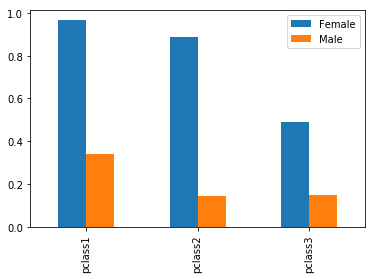

In [121]:
SurvivorsP = {'Male'   : pd.Series([tmc1, tmc2, tmc3], index=['pclass1', 'pclass2', 'pclass3']), 
             'Female' : pd.Series([tfc1, tfc2, tfc3], index=['pclass1', 'pclass2', 'pclass3'])}

SurvivorsData = pd.DataFrame(SurvivorsP)
SurvivorsData.plot.bar();

# 6. Splitting Data into two by age

Two equally populated age categories can be created by dividing the hole group through the median value :

In [122]:
ages  = Titanic[['pclass','age','survived','sex']].copy()
ages['ageCat'] = pd.Series(np.random.randn(len(Titanic)), index=Titanic.index)

ages = ages[np.isfinite(ages['age'])]
ages = ages.reset_index(drop=True)

The median value is calculated and the entire dataframe has been divided into two categories labeled 0, and 1 and stored in a new 'ageCat' column

In [123]:
AgeMedian = ages['age'].median()
ages['ageCat'] = pd.Series(np.random.randn(len(Titanic)), index=Titanic.index)

for j in range (len(ages)):
    
    if (ages['age'][j] < AgeMedian) :  #1309/2=654.5
        ages['ageCat'][j] = 0
    else:
        ages['ageCat'][j] = 1


/Users/firasbenothman/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/firasbenothman/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


We only take into account useful columns for our code here.

In [124]:
ages = ages[['pclass','ageCat','survived','sex']]

All dataframes needed to generate our resulting dataframe are generated here and named as follows:

M : male , F : female.

ij -> i : travel class , j : age category

So for example the dataframe of males of the age category 0  and travel class three is name M30, and so on.

In [169]:
M = ages[ages.sex=='male']
M1 = M[M.pclass==1]
M2 = M[M.pclass==2]
M3 = M[M.pclass==3]

M10 = M1[M1.ageCat==0]
M11 = M1[M1.ageCat==1]

M20 = M2[M2.ageCat==0]
M21 = M2[M2.ageCat==1]

M30 = M3[M3.ageCat==0]
M31 = M3[M3.ageCat==1]

F = ages[ages.sex=='female']
F1 = F[F.pclass==1]
F2 = F[F.pclass==2]
F3 = F[F.pclass==3]

F10 = F1[F1.ageCat==0]
F11 = F1[F1.ageCat==1]

F20 = F2[F2.ageCat==0]
F21 = F2[F2.ageCat==1]

F30 = F3[F3.ageCat==0]
F31 = F3[F3.ageCat==1]

The means are calculated for each dataframe below and they are named exactly like before only with lowercase letter for male and female.

In [170]:
m10 = mean([int(M10['survived'][i]) for  i in M10.index])
m11 = mean([int(M11['survived'][i]) for  i in M11.index])

m20 = mean([int(M20['survived'][i]) for  i in M20.index])
m21 = mean([int(M21['survived'][i]) for  i in M21.index])

m30 = mean([int(M30['survived'][i]) for  i in M30.index])
m31 = mean([int(M31['survived'][i]) for  i in M31.index])

f10 = mean([int(F10['survived'][i]) for  i in F10.index])
f11 = mean([int(F11['survived'][i]) for  i in F11.index])

f20 = mean([int(F20['survived'][i]) for  i in F20.index])
f21 = mean([int(F21['survived'][i]) for  i in F21.index])

f30 = mean([int(F30['survived'][i]) for  i in F30.index])
f31 = mean([int(F31['survived'][i]) for  i in F31.index])

The dataframe needed is generated and a graph showing the pourcentages is shown below.

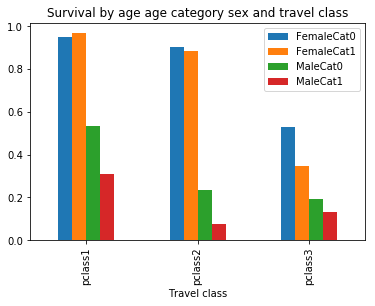

In [173]:
SurvivalP = {'MaleCat0'   : pd.Series([m10, m20, m30], index=['pclass1', 'pclass2', 'pclass3']), 
             'MaleCat1'   : pd.Series([m11, m21, m31], index=['pclass1', 'pclass2', 'pclass3']), 
             'FemaleCat0' : pd.Series([f10, f20, f30], index=['pclass1', 'pclass2', 'pclass3']), 
             'FemaleCat1' : pd.Series([f11, f21, f31], index=['pclass1', 'pclass2', 'pclass3'])}

SurvivalData = pd.DataFrame(SurvivalP)
SurvivalData.plot.bar(title='Survival by age age category sex and travel class');
plt.xlabel('Travel class')
plt.show()

The dataframe is shown here.

In [174]:
SurvivalData

,FemaleCat0,FemaleCat1,MaleCat0,MaleCat1
pclass1,0.950000,0.967742,0.535714,0.308943
pclass2,0.901961,0.884615,0.235294,0.077778
pclass3,0.528302,0.347826,0.194313,0.130435
